## Observations
- The bar graph showing mean sentiment score varies from day to to day. On June 25, the New York Times and CNN scores were closest to neutral, and all news sources showed scores on the negative side of the scale. It was a bad day, perhaps. On June 26, Fox News is the only one to show a positive score, while BBC and NYT are closest to neutral. On June 28, Fox News is still the only one to show a positive score (are they excited about Justice Kennedy's retirement?), while BBC and NYT are closest to neutral.
- The scatterplot of tweet sentiment over time displays a pattern of sentiment cluster around the '0.0' score indicating neutrality. Other than that cluster of neutrality, which one might expect given the values of journalism to present balanced information, the pattern is random. All sources have dots everywhere, and we don't see a difference over time. There are more dots in the negative part of the plot, which, at a guess, may be due to the charged issue of separating families at the U.S. border. The scatterplot looked much the same on June 25 as it did on June 26. On June 28, the distribution still looks fairly random 

In [1]:
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

def get_tweets_by_handle(the_handle, count):
    res_list = []
    for status in tweepy.Cursor(api.user_timeline, id=the_handle).items(count):
        res_list.append(status)
    return pd.DataFrame([x._json for x in res_list])

In [4]:
frames = [get_tweets_by_handle(x, 100) for x in users]

In [5]:
df = pd.concat(frames, axis=0)

In [6]:
df = df[['user', 'text', 'created_at']]

In [7]:
df['name'] = df.user.map(lambda x: x.get('name'))

In [8]:
df.head()

,user,text,created_at,name
0,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Charlottesville car attack suspect charged wit...,Thu Jun 28 16:42:58 +0000 2018,BBC News (World)
1,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",In pictures: Despair as Senegal crash out of W...,Thu Jun 28 16:21:29 +0000 2018,BBC News (World)
2,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Reality Check: Which countries have military s...,Thu Jun 28 16:06:48 +0000 2018,BBC News (World)
3,"{'id': 742143, 'id_str': '742143', 'name': 'BB...","RT @BBCAfrica: For months now, horrific images...",Thu Jun 28 16:03:03 +0000 2018,BBC News (World)
4,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",RT @BBCAfrica: FT #SEN 0-1 #COL\n\nHeartbreak...,Thu Jun 28 15:56:37 +0000 2018,BBC News (World)


In [9]:
tw_ago = [str(x) for x in list(range(1,101))]

In [10]:
tw_ago = 5 * tw_ago

In [11]:
tw_ago = [int(x) for x in tw_ago]

In [12]:
len(tw_ago)

500

In [13]:
tw_ago = pd.Series(tw_ago)

In [14]:
df['tweets_ago'] = tw_ago.values

In [15]:
df.tail()

,user,text,created_at,name,tweets_ago
95,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",RT @NYTMetro: A new report on New York's subwa...,Thu Jun 28 03:17:06 +0000 2018,The New York Times,96
96,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",A drop of good news about the world’s oceans: ...,Thu Jun 28 03:02:06 +0000 2018,The New York Times,97
97,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",RT @nytgraphics: With Justice Kennedy's retire...,Thu Jun 28 02:47:01 +0000 2018,The New York Times,98
98,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","Cousins' DNA, uploaded to an ancestry site, le...",Thu Jun 28 02:32:07 +0000 2018,The New York Times,99
99,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",News Analysis: Courts are by tradition named f...,Thu Jun 28 02:17:05 +0000 2018,The New York Times,100


In [16]:
df.shape

(500, 5)

In [17]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(some_text):
    return analyzer.polarity_scores(some_text)

In [18]:
df['sent'] = df.text.map(get_sentiment)

df['pos']= df.sent.map(lambda x :x.get('pos'))
df['neg']= df.sent.map(lambda x :x.get('neg'))
df['neu']= df.sent.map(lambda x :x.get('neu'))
df['compound']= df.sent.map(lambda x :x.get('compound'))

In [19]:
df.tail()

,user,text,created_at,name,tweets_ago,sent,pos,neg,neu,compound
95,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",RT @NYTMetro: A new report on New York's subwa...,Thu Jun 28 03:17:06 +0000 2018,The New York Times,96,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
96,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",A drop of good news about the world’s oceans: ...,Thu Jun 28 03:02:06 +0000 2018,The New York Times,97,"{'neg': 0.147, 'neu': 0.735, 'pos': 0.118, 'co...",0.118,0.147,0.735,0.0772
97,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",RT @nytgraphics: With Justice Kennedy's retire...,Thu Jun 28 02:47:01 +0000 2018,The New York Times,98,"{'neg': 0.113, 'neu': 0.542, 'pos': 0.345, 'co...",0.345,0.113,0.542,0.6908
98,"{'id': 807095, 'id_str': '807095', 'name': 'Th...","Cousins' DNA, uploaded to an ancestry site, le...",Thu Jun 28 02:32:07 +0000 2018,The New York Times,99,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",0.000,0.225,0.775,-0.4927
99,"{'id': 807095, 'id_str': '807095', 'name': 'Th...",News Analysis: Courts are by tradition named f...,Thu Jun 28 02:17:05 +0000 2018,The New York Times,100,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.145,0.000,0.855,0.5267


In [20]:
df[['pos', 'neg', 'neu']].describe()

,pos,neg,neu
count,500.000000,500.000000,500.000000
mean,0.077114,0.086614,0.836274
std,0.113091,0.127284,0.146686
min,0.000000,0.000000,0.219000
25%,0.000000,0.000000,0.721000
50%,0.000000,0.000000,0.841000
75%,0.148500,0.158000,1.000000
max,0.531000,0.781000,1.000000


In [21]:
dfbar = df[['name', 'compound']]

In [22]:
dfbar = dfbar.groupby('name').mean()

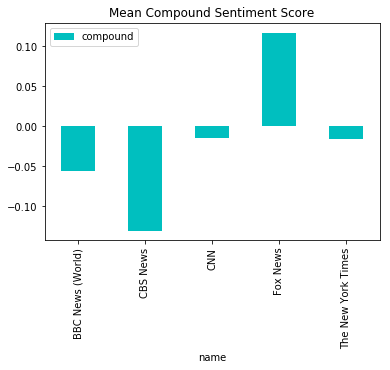

In [23]:
sent_bar = dfbar.plot.bar(color='c', title='Mean Compound Sentiment Score');

In [24]:
import seaborn as sns

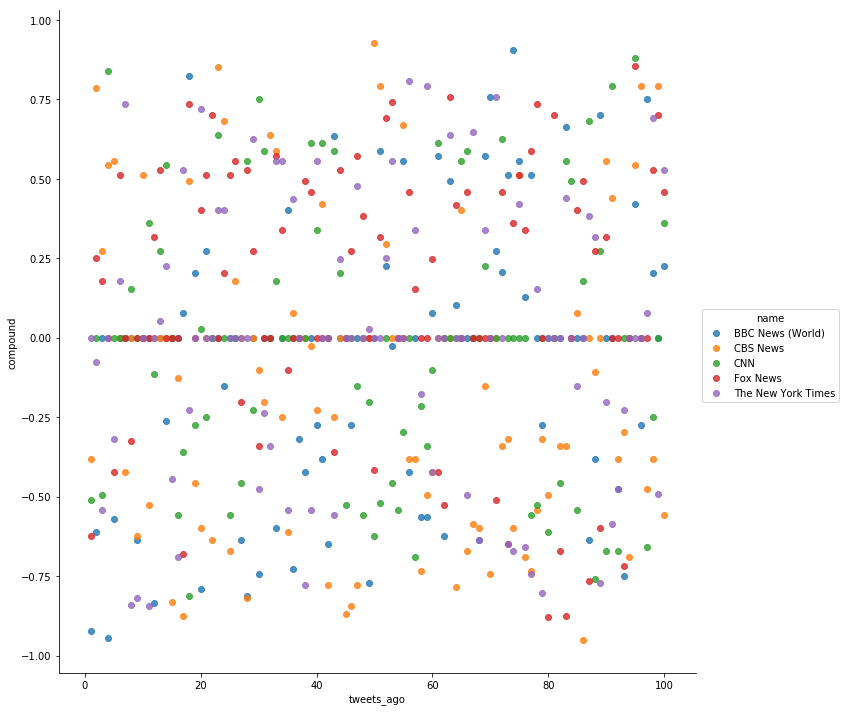

In [25]:
sent_scatter = sns.lmplot( x="tweets_ago", y="compound", data=df, fit_reg=False, hue='name', size=10, legend_out=True);

In [26]:
df.to_csv('tweet_sentiment_20180628.csv', sep='\t')

In [27]:
sent_scatter.savefig('sentiment_scatterplot_20180628.png')

In [28]:
fig = sent_bar.get_figure()
fig.savefig("sentiment_barchart_20180628.png")